## Kaggle Survey Analysis 2020

This survey contains information from 20036 representatives that do survey on Kaggle 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
from collections import Counter

df = pd.read_csv('Analysis Data Kaggle Survey.csv')
df.head()

set_1 = df.groupby(['Language Recommend','Education']).count()['Age'].reset_index(name = 'Number of representatives')

set_1

,Language Recommend,Education,Number of representatives
0,Bash,Bachelor’s degree,7
1,Bash,Doctoral degree,8
2,Bash,I prefer not to answer,3
3,Bash,Master’s degree,6
4,Bash,No formal education past high school,1
...,...,...,...
88,SQL,Some college/university study without earning ...,34
89,Swift,Bachelor’s degree,6
90,Swift,Master’s degree,8
91,Swift,No formal education past high school,1


### Number of people that recommend each coding language

In [2]:
set_1.groupby('Language Recommend').sum()['Number of representatives'].reset_index().sort_values(by = 'Number of representatives', ascending = False)

,Language Recommend,Number of representatives
10,Python,14241
7,No Answer,2215
11,R,1259
12,SQL,849
2,C++,325
1,C,301
6,MATLAB,195
3,Java,167
9,Other,151
5,Julia,121


###  Number of people for each education level

In [3]:
set_1.groupby('Education').sum()['Number of representatives'].reset_index().sort_values(by = 'Number of representatives', ascending = False)

,Education,Number of representatives
3,Master’s degree,7859
0,Bachelor’s degree,6978
1,Doctoral degree,2302
7,Some college/university study without earning ...,1092
6,Professional degree,699
4,No Answer,467
2,I prefer not to answer,399
5,No formal education past high school,240


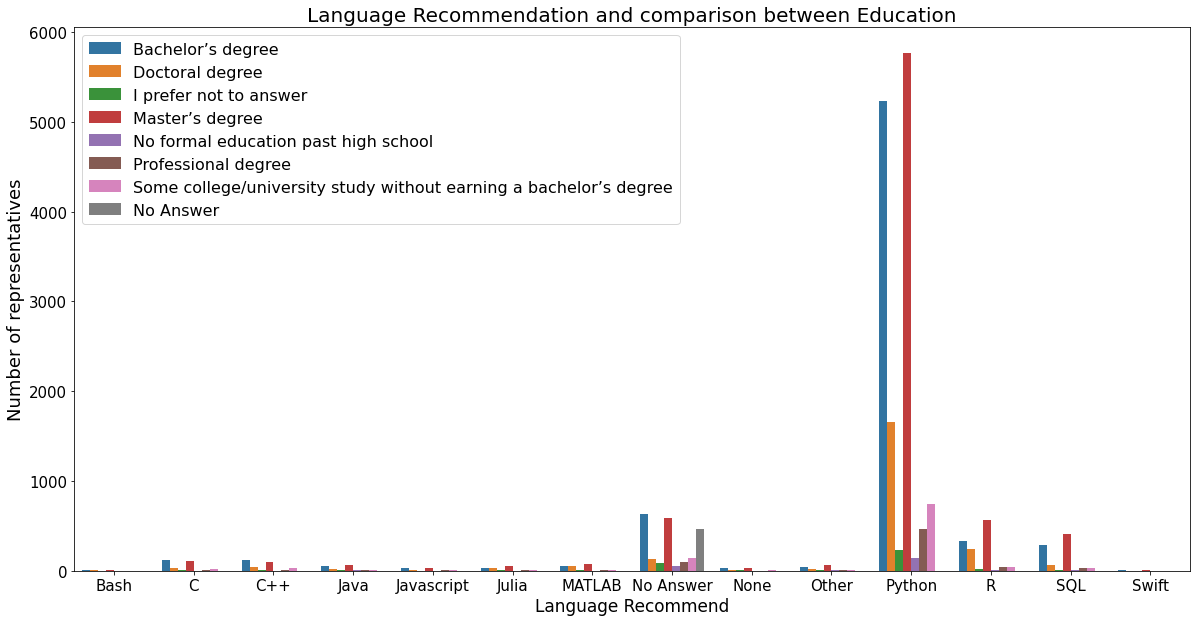

In [4]:
figure(figsize = (20,10))
plt.title('Language Recommendation and comparison between Education', fontsize =20)
sns.barplot(x= 'Language Recommend', y= 'Number of representatives', hue = 'Education',data = set_1)
plt.xlabel('Language Recommend', fontsize = 17)
plt.ylabel('Number of representatives', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc=2, prop={'size': 16})

### Country originated count

In [5]:
df['Country Origin'].value_counts().reset_index().head()

,index,Country Origin
0,India,5851
1,United States of America,2237
2,Other,1388
3,Brazil,694
4,Japan,638


### Courses Platform count

In [6]:
words_count = ",".join(map(str,df["Courses Platform"])).split(',')

Counter(words_count).most_common(50)

[('Coursera', 7382),
 ('No Answer', 6203),
 ('Kaggle Learn Courses', 4843),
 ('Udemy', 4626),
 ('University Courses (resulting in a university degree)', 3568),
 ('DataCamp', 3032),
 ('edX', 2498),
 ('Udacity', 2056),
 ('Other', 1636),
 ('LinkedIn Learning', 1617),
 ('None', 1306),
 ('Cloud-certification programs (direct from AWS', 1076),
 (' Azure', 1076),
 (' GCP', 1076),
 (' or similar)', 1076),
 ('Fast.ai', 1058)]

Top 5 Recommendation Courses:
* Coursera
* Kaggle Courses
* Udemy
* University
* Datacamp

### Salary count

In [7]:
df['Salary'].value_counts()

No Answer          9307
$0-999             2128
10,000-14,999       665
1,000-1,999         581
100,000-124,999     573
40,000-49,999       552
30,000-39,999       540
50,000-59,999       510
5,000-7,499         488
15,000-19,999       449
60,000-69,999       408
20,000-24,999       404
70,000-79,999       394
7,500-9,999         371
150,000-199,999     347
2,000-2,999         330
125,000-149,999     315
25,000-29,999       310
90,000-99,999       280
4,000-4,999         279
80,000-89,999       273
3,000-3,999         264
200,000-249,999     115
300,000-500,000      55
> $500,000           50
250,000-299,999      48
Name: Salary, dtype: int64

## Current title count

In [8]:
df['Current title'].value_counts()

Student                      5171
Data Scientist               2676
Software Engineer            1968
Other                        1737
Currently not employed       1652
Data Analyst                 1475
Research Scientist           1174
Machine Learning Engineer    1082
Business Analyst              798
No Answer                     759
Product/Project Manager       692
Data Engineer                 437
Statistician                  290
DBA/Database Engineer         125
Name: Current title, dtype: int64

##  General summary finding from the survey

* Python is the most recommended language according to the survey with R come to 2nd and SQL is 3rd
* Most representatives are originated from India and United States
* Majority of the surveyers have Master and Bachelor degree
* Most surveyers do not want to answer about their salary
* There are 5171 Students in the surveys approximately 26%
* Top 5 courses platform recommendation are (1. Coursera, 2. Kaggle Courses, 3. Udemy,4. University, 5. Datacamp)



# Let see the comparison between Data Scientists and Software Engineers

In [9]:
ds = df[df['Current title'] == 'Data Scientist']
se = df[df['Current title'] == 'Software Engineer']

## Data Scientists origin count

In [10]:
set_2 =ds['Country Origin'].value_counts().head().reset_index()

set_2.columns = ['DS Country Origin', 'Numbers']

set_2

,DS Country Origin,Numbers
0,India,583
1,United States of America,389
2,Other,180
3,Brazil,123
4,United Kingdom of Great Britain and Northern I...,112


## Software Engineer origin count

In [11]:
set_3 = se['Country Origin'].value_counts().head().reset_index()

set_3.columns = ['SE Country Origin', 'Numbers']

set_3

,SE Country Origin,Numbers
0,India,598
1,United States of America,219
2,Other,142
3,Japan,98
4,Brazil,76


## Data Scientists language recommendation

In [12]:
set_4 =ds['Language Recommend'].value_counts().head().reset_index()

set_4.columns = ['DS Coding Language Recommend', 'Numbers']

set_4

,DS Coding Language Recommend,Numbers
0,Python,2087
1,R,217
2,SQL,187
3,No Answer,70
4,Julia,20


### Software Engineers language recommendation

In [13]:
set_5 =se['Language Recommend'].value_counts().head().reset_index()

set_5.columns = ['SE Coding Language Recommend', 'Numbers']

set_5

,SE Coding Language Recommend,Numbers
0,Python,1575
1,R,76
2,No Answer,65
3,SQL,62
4,C,40


## Data Scientists Courses Platforms Learn

In [14]:
words_count_ds = ",".join(map(str,ds["Courses Platform"])).split(',')

ds_course_count =Counter(words_count_ds).most_common(50)

ds_course = pd.DataFrame(ds_course_count)

ds_course.columns = ['DS Courses Learn', 'Number of learners']

ds_course

,DS Courses Learn,Number of learners
0,Coursera,1410
1,Udemy,777
2,University Courses (resulting in a university ...,689
3,Kaggle Learn Courses,675
4,DataCamp,663
5,edX,500
6,No Answer,438
7,Udacity,428
8,LinkedIn Learning,276
9,Fast.ai,264


### Software Engineers Courses Platforms Learn

In [15]:
words_count_se = ",".join(map(str,se["Courses Platform"])).split(',')


se_course_count =Counter(words_count_se).most_common(50)

se_course = pd.DataFrame(se_course_count)

se_course.columns = ['SE Courses Learn', 'Number of learners']

se_course

,SE Courses Learn,Number of learners
0,Coursera,762
1,Udemy,537
2,Kaggle Learn Courses,514
3,No Answer,512
4,University Courses (resulting in a university ...,298
5,Udacity,246
6,DataCamp,211
7,edX,199
8,None,172
9,LinkedIn Learning,158


## Surprising Finding

* Most people from the survey with SE or DS as their title recommend the same coding language(1.Python,2.R,3.SQL)
* Both SE and DS mostly originated from India
* DS have different courses recommendation where DS have university courses rank 3rd whereas SE rank 5th
* This could shows that most SE are self-taught by other platforms than going to traditional university.
* Both SE and DS learn mostly on Coursera and Udemy. This can proves that Software Engineers and Data Scientists can mostly be self-taught without going to university.